<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session8/blob/main/ERA1S8_GN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Transformations


In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [4]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:01<00:00, 88430062.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [6]:
import model
import utils

from model import *
from utils import *

## Sample Images

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

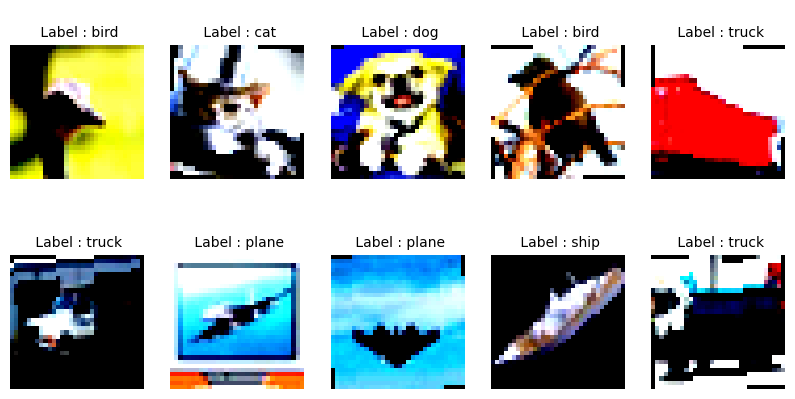

In [7]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [8]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='GN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [9]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [10]:
from torch.optim.lr_scheduler import StepLR

model =  Net(norm='GN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    #scheduler.step()
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.3681495189666748 Batch_id=390 Accuracy=35.38: 100%|██████████| 391/391 [00:47<00:00,  8.19it/s]



Test set: Average loss: 1.4795, Accuracy: 4592/10000 (45.92%)

EPOCH: 2


Loss=1.0906720161437988 Batch_id=390 Accuracy=49.92: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]



Test set: Average loss: 1.2650, Accuracy: 5394/10000 (53.94%)

EPOCH: 3


Loss=1.3477270603179932 Batch_id=390 Accuracy=55.22: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]



Test set: Average loss: 1.1592, Accuracy: 5851/10000 (58.51%)

EPOCH: 4


Loss=1.1303123235702515 Batch_id=390 Accuracy=59.59: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]



Test set: Average loss: 1.0988, Accuracy: 6105/10000 (61.05%)

EPOCH: 5


Loss=1.348899483680725 Batch_id=390 Accuracy=62.14: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]



Test set: Average loss: 1.0347, Accuracy: 6330/10000 (63.30%)

EPOCH: 6


Loss=0.9981380701065063 Batch_id=390 Accuracy=64.58: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]



Test set: Average loss: 0.9154, Accuracy: 6828/10000 (68.28%)

EPOCH: 7


Loss=0.6790621280670166 Batch_id=390 Accuracy=66.16: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]



Test set: Average loss: 0.9126, Accuracy: 6763/10000 (67.63%)

EPOCH: 8


Loss=0.8650587201118469 Batch_id=390 Accuracy=67.67: 100%|██████████| 391/391 [00:49<00:00,  7.95it/s]



Test set: Average loss: 0.9229, Accuracy: 6776/10000 (67.76%)

EPOCH: 9


Loss=0.9689515829086304 Batch_id=390 Accuracy=68.64: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]



Test set: Average loss: 0.8838, Accuracy: 6945/10000 (69.45%)

EPOCH: 10


Loss=0.7766013741493225 Batch_id=390 Accuracy=70.01: 100%|██████████| 391/391 [00:49<00:00,  7.87it/s]



Test set: Average loss: 0.8152, Accuracy: 7212/10000 (72.12%)

EPOCH: 11


Loss=0.761294424533844 Batch_id=390 Accuracy=70.74: 100%|██████████| 391/391 [00:48<00:00,  8.01it/s]



Test set: Average loss: 0.8126, Accuracy: 7168/10000 (71.68%)

EPOCH: 12


Loss=0.8655914068222046 Batch_id=390 Accuracy=71.59: 100%|██████████| 391/391 [00:48<00:00,  8.00it/s]



Test set: Average loss: 0.8162, Accuracy: 7150/10000 (71.50%)

EPOCH: 13


Loss=0.8420583605766296 Batch_id=390 Accuracy=71.92: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]



Test set: Average loss: 0.7758, Accuracy: 7328/10000 (73.28%)

EPOCH: 14


Loss=0.704643189907074 Batch_id=390 Accuracy=72.65: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]



Test set: Average loss: 0.7508, Accuracy: 7389/10000 (73.89%)

EPOCH: 15


Loss=0.731417179107666 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:51<00:00,  7.66it/s]



Test set: Average loss: 0.7488, Accuracy: 7376/10000 (73.76%)

EPOCH: 16


Loss=0.858803391456604 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:52<00:00,  7.45it/s]



Test set: Average loss: 0.7558, Accuracy: 7351/10000 (73.51%)

EPOCH: 17


Loss=0.8577049374580383 Batch_id=390 Accuracy=73.96: 100%|██████████| 391/391 [00:51<00:00,  7.58it/s]



Test set: Average loss: 0.7034, Accuracy: 7558/10000 (75.58%)

EPOCH: 18


Loss=0.8620158433914185 Batch_id=390 Accuracy=74.43: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]



Test set: Average loss: 0.7064, Accuracy: 7593/10000 (75.93%)

EPOCH: 19


Loss=0.6899500489234924 Batch_id=390 Accuracy=74.99: 100%|██████████| 391/391 [00:51<00:00,  7.67it/s]



Test set: Average loss: 0.7273, Accuracy: 7448/10000 (74.48%)

EPOCH: 20


Loss=0.8741852641105652 Batch_id=390 Accuracy=75.23: 100%|██████████| 391/391 [00:48<00:00,  8.11it/s]



Test set: Average loss: 0.6900, Accuracy: 7657/10000 (76.57%)



In [11]:
train_losses1 = [t.cpu().item() for t in train_losses]

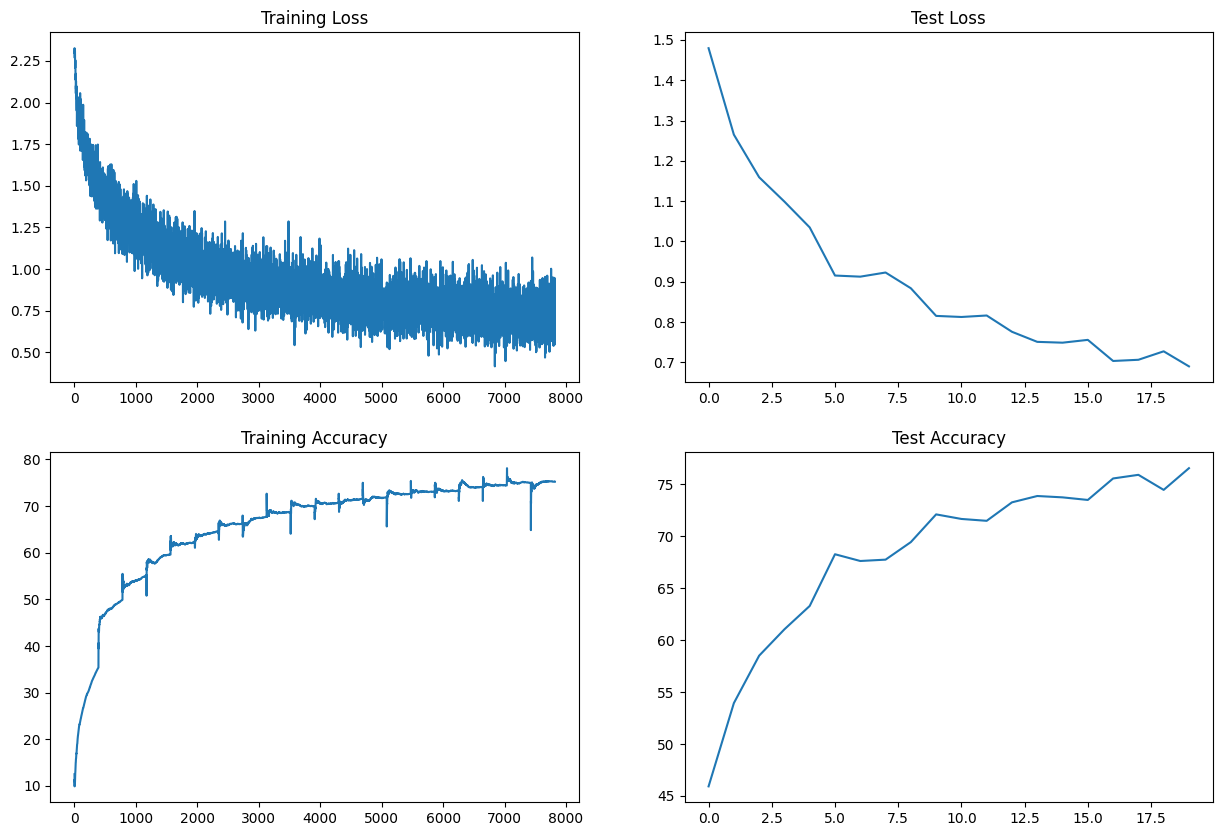

In [12]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [13]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

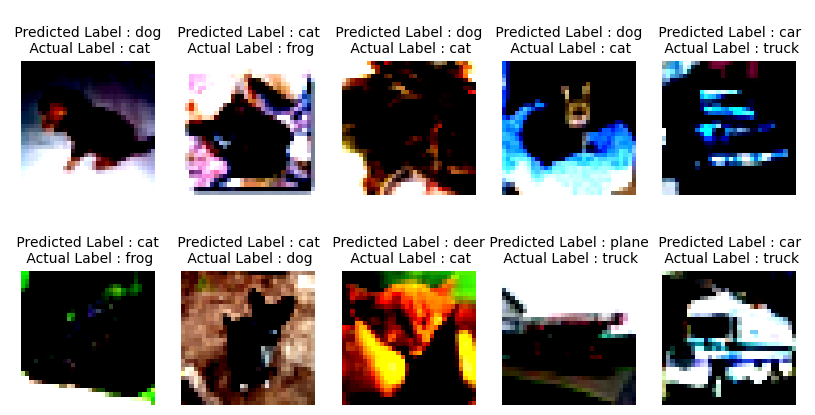

In [14]:
display_incorrect_images(wrong_prediction_list, n=10 )